In [1]:
import os
import pandas as pd
path = os.path.dirname(os.path.realpath('__file__'))
print(path)
wine_data = pd.read_csv(path + '\\ML\\winequality-red.csv'  , sep=';')
wine_data.head()

C:\Users\Rowida Nagah


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# check out Null data
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
print(wine_data.info())
print("---------------------------------------------------------------------------------------")
wine_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
---------------------------------------------------------------------------------------


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


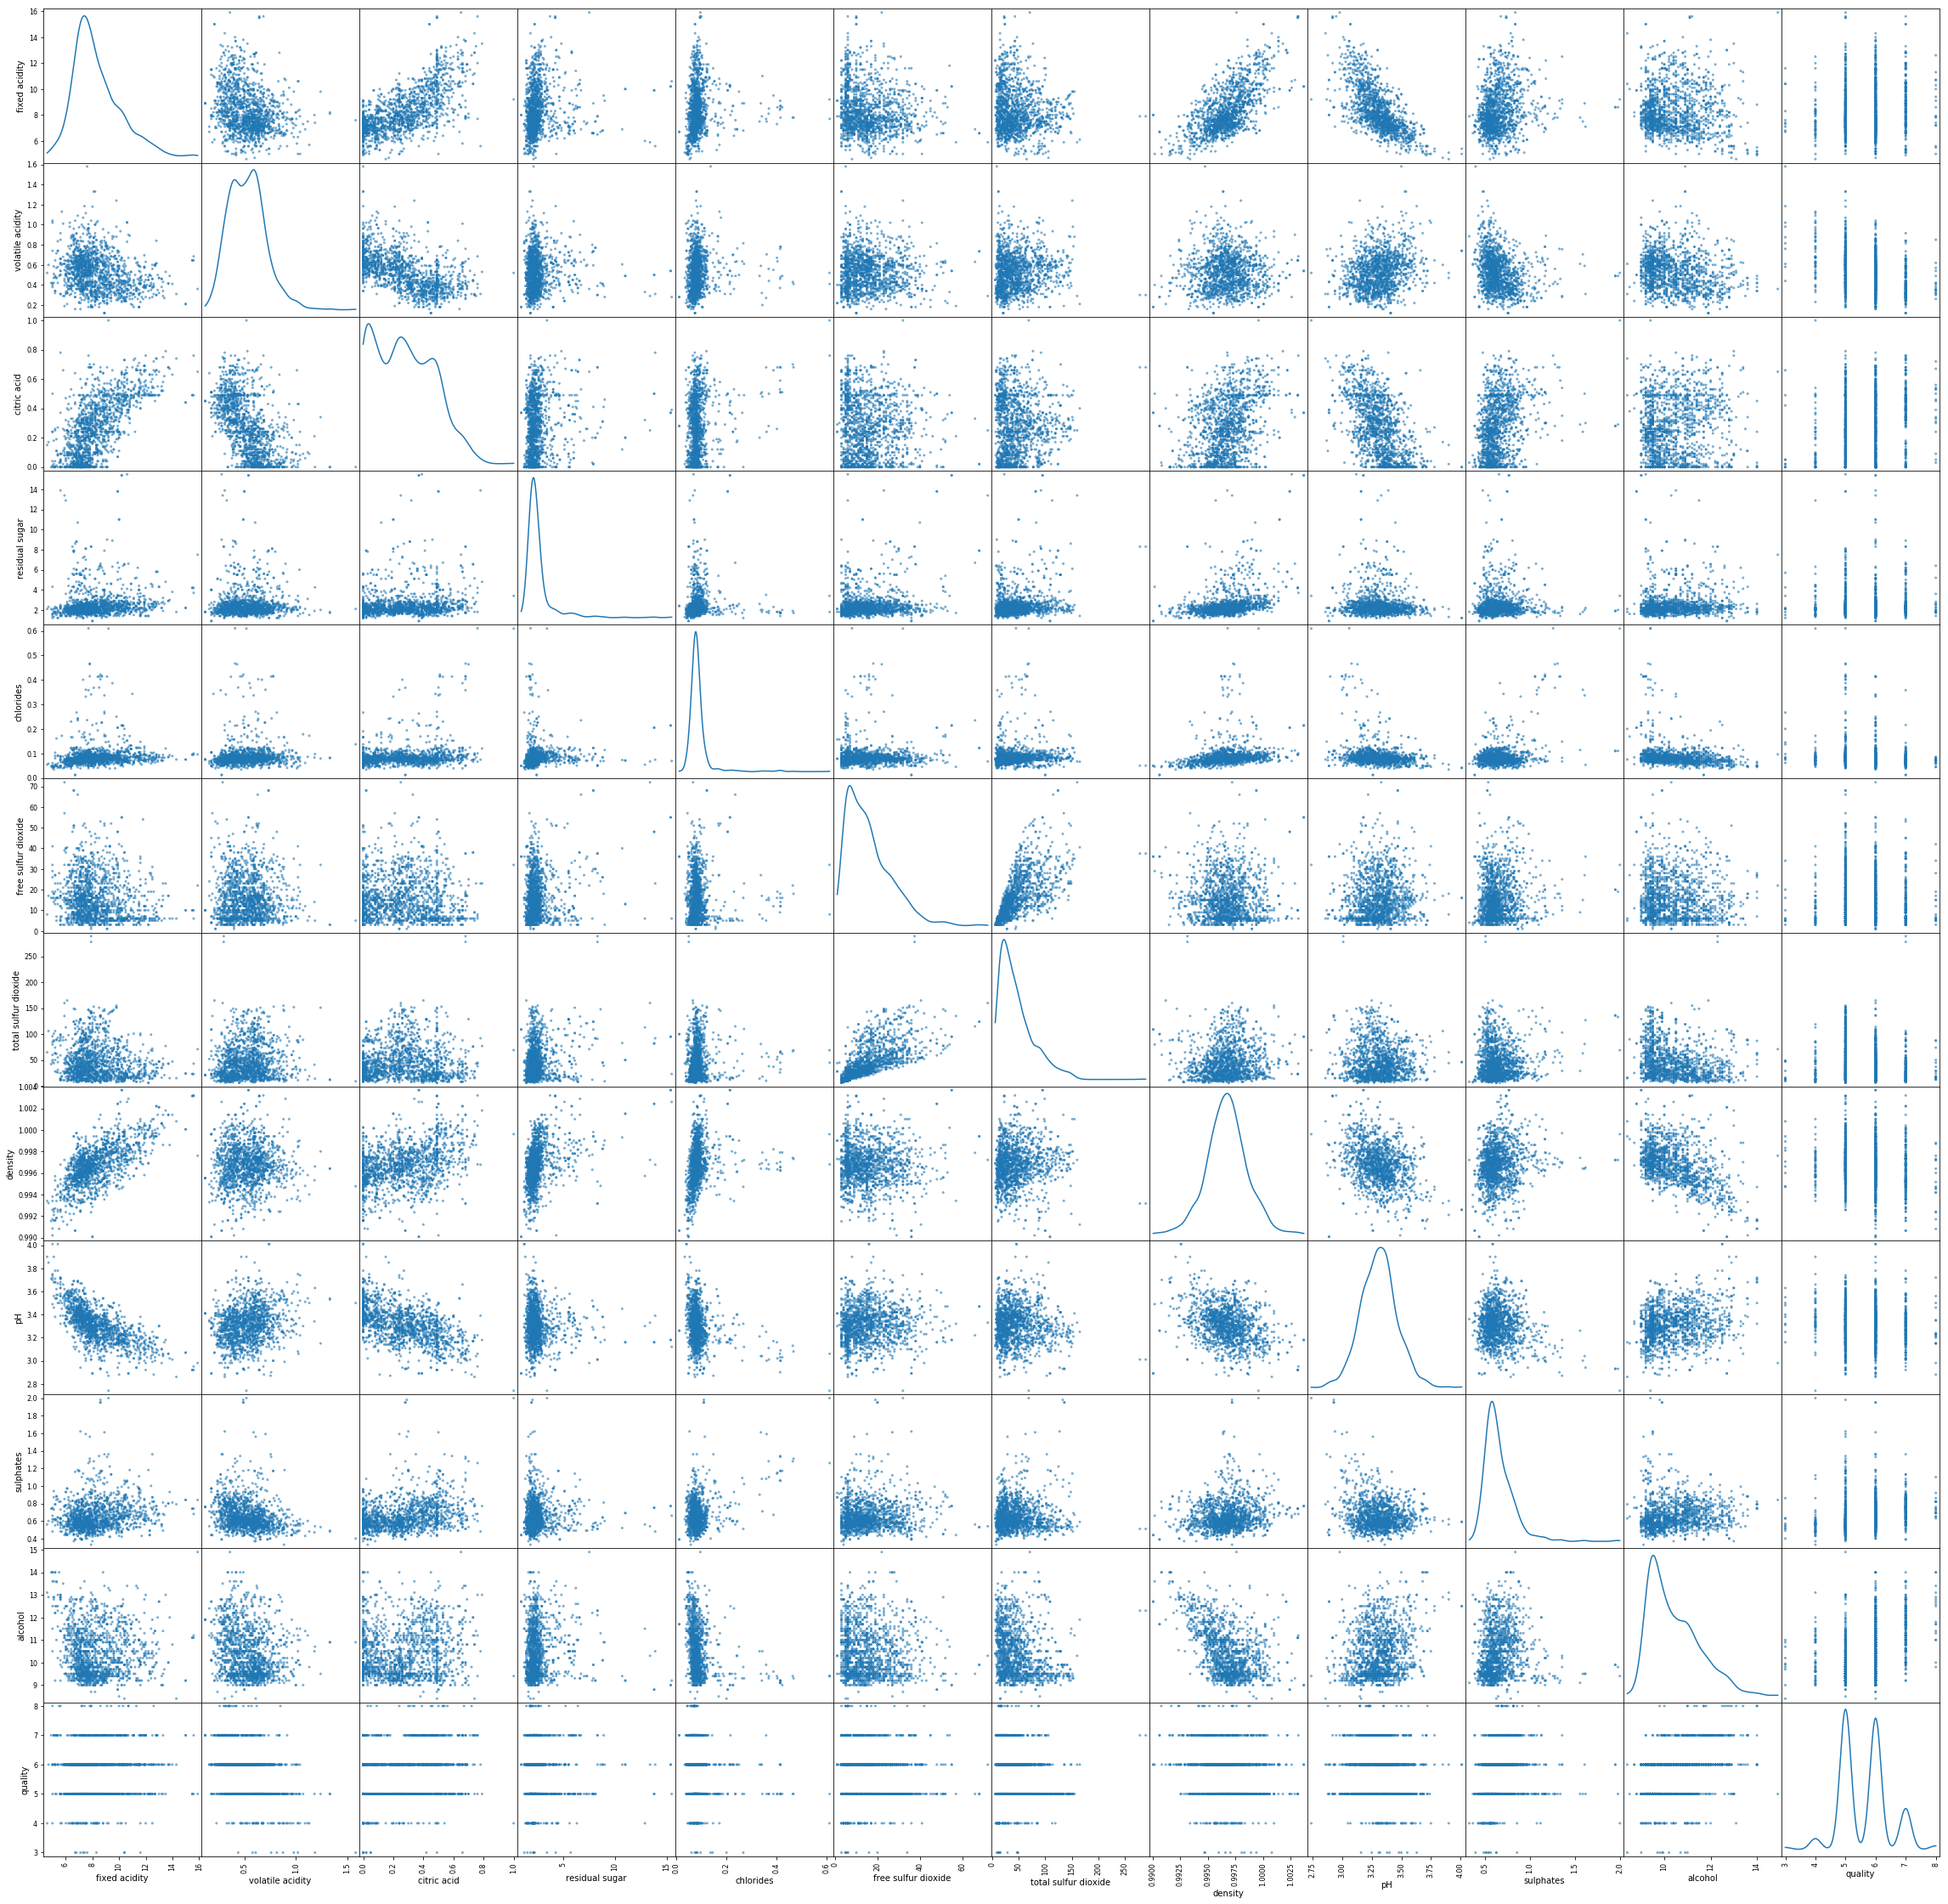

In [21]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(wine_data, alpha = 0.6, figsize = (40,40), diagonal = 'kde');


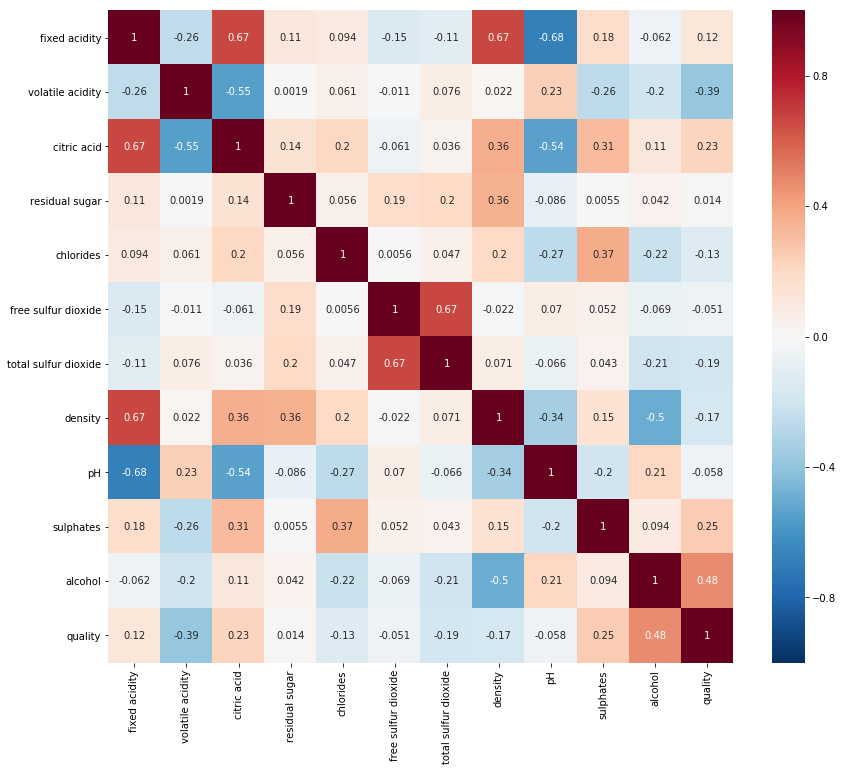

In [7]:
## not yet
import seaborn as sns
correlation = wine_data.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [8]:
#  normalizing the data
'''
Standardization is the process of subtracting the means from each feature and then dividing by the feature 
standard deviations.  >-------training data
'''
data = (wine_data - wine_data.mean()) / wine_data.std()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576


In [10]:
# same as  , though in 2d numpy array 
from sklearn import preprocessing
data2= preprocessing.scale(wine_data)
data2

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [11]:
print(len(data2))
print()
print(len(data2[1]))
print()
print(data.shape)
wine_data.shape

1599

12

(1599, 12)


(1599, 12)

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np
Y = wine_data.quality
X = wine_data.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)
# convert to matrices  
x = np.matrix(X.values)
y = np.matrix(Y.values)
#initialize theta
theta = np.matrix(np.array([0,0,0,0,0,0,0,0,0,0,0])) ### 11 same as features number

In [17]:
def computeCost(X, Y, theta):
    inner = np.power(((X * theta.T) - Y), 2)
    return np.sum(inner) / (2 * len(X))
computeCost(x,y,theta)

25917.0

In [18]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)